Refer to TextClassificationCNN for preprocessing details

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.0.0'

In [7]:
df=pd.read_csv('spam.csv',error_bad_lines=False)
X=df['v2']
y=df['v1'].apply(lambda x:0 if x=='spam' else 1)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

In [8]:
num_words=None
embedding_length=20
tok=Tokenizer(num_words=num_words)
tok.fit_on_texts(X_train)
X_train=tok.texts_to_sequences(X_train)
X_test=tok.texts_to_sequences(X_test)
X_train=pad_sequences(X_train)
X_test=pad_sequences(X_test,maxlen=X_train.shape[1])
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [9]:
maxsequencelength=X_train.shape[1]
maxsequencelength

162

In [10]:
X_train.shape,y_train.shape

((4179, 162), (4179,))

In [11]:
input_dim=num_words if num_words else (max(tok.word_index.values())+1)
input_dim

7654

In [13]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=input_dim,output_dim=embedding_length,input_length=maxsequencelength))
model.add(tf.keras.layers.LSTM(15, return_sequences=True))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 162, 20)           153080    
_________________________________________________________________
lstm_1 (LSTM)                (None, 162, 15)           2160      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 155,256
Trainable params: 155,256
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
# Train the model
r = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_test, y_test))

Train on 4179 samples, validate on 1393 samples
Epoch 1/5
4179/4179 [==============================] - 23s 6ms/sample - loss: 0.4591 - accuracy: 0.8550 - val_loss: 0.3377 - val_accuracy: 0.8715
Epoch 2/5
4179/4179 [==============================] - 20s 5ms/sample - loss: 0.2633 - accuracy: 0.8641 - val_loss: 0.1999 - val_accuracy: 0.8729
Epoch 3/5
4179/4179 [==============================] - 21s 5ms/sample - loss: 0.1602 - accuracy: 0.9682 - val_loss: 0.1410 - val_accuracy: 0.9770
Epoch 4/5
4179/4179 [==============================] - 21s 5ms/sample - loss: 0.1081 - accuracy: 0.9835 - val_loss: 0.0998 - val_accuracy: 0.9785
Epoch 5/5
4179/4179 [==============================] - 21s 5ms/sample - loss: 0.0687 - accuracy: 0.9902 - val_loss: 0.1129 - val_accuracy: 0.9612


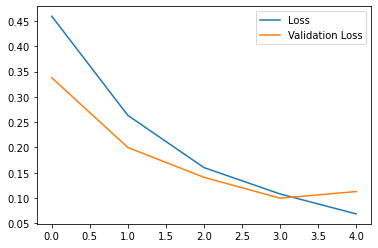

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

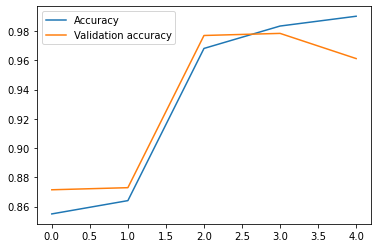

In [18]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()